In [36]:
import numpy as np
%matplotlib notebook 
import matplotlib.pyplot as plt

Summary from all of the different notes we have:

We have the Gaussian potential $V(x)=-U\sum_n e^{-(x-na)^2/2\sigma^2}$ which is writen in Fourier components as: $V(x)=\sum_{G_j}-U\sqrt {2\pi}\frac{\sigma}{a}e^{-G^2_j \sigma^2/2} e^{i G_j x} \equiv  \sum_{G_j} V_{G_j} \cdot e^{i G_j x}$.

We are solving the eigenvalue equation:
$\Big( \frac{\hbar^2 (k+K)^2}{2m} - \varepsilon \Big) c_{k+K} +\sum_G c_{k+K-G} V_G$ and search for $\varepsilon$ - the energy eigenvectors.

Define different stuff
* Don't confuse, *K* is a reciprocal lattice vector, *k* is a wave vector $k\in [-\pi/a; \pi/a)$
* *MaxK* - maximal reciprocal lattice vector we consider including in the sum ($K$ or $K-G$). Then summation goes from *-MaxK* to *MaxK*
* *N_k* - in how many peaces we split $[0, \pi/a)$
* Potential here and energy later at the moment is in arbitrary units, but need to be calculated. I believe I could make it all pretier by multiplying only at the end with some constant which would bring units. Otherwise it does not look good now

In [37]:
a=3      #Latice constant in Åmstrongs
sigma=a/4 #Very arbitrary value
U=10     #
maxK=2
NrOfK=maxK*2+1
Len_k=4

The ampliture of $V_G$ we call $A$, thus $A \equiv -U\sqrt {2\pi}\frac{\sigma}{a}$ and  $V_G = A e^{-G^2 \sigma^2/2} $

In [38]:
A=-U*np.sqrt(2 *np.pi)*sigma/a

Run Bandstructure file for each *k* value

In [39]:
Energies=np.zeros(shape=(Len_k*2+1, NrOfK))
kVect=[0]*(Len_k*2+1)
for ki in range(-Len_k,Len_k+1):
    %run BandStructureFunction.ipynb
    Energies[ki+Len_k]=np.real(E)
    kVect[ki+Len_k]=ki*a

Plot potentials

In [40]:
%%capture
#If you want to display the figure here, then uncomment previous line
fig, [ax,ax2]=plt.subplots(nrows=1, ncols=2)  #Two plots in the same figure

x=np.linspace(-5*a,5*a,100)
Vx=-U*np.exp(-x**2/(2*sigma**2))
VxSum=[0]*len(x)
for n in range(-5,6):
    Vx1=-U*np.exp(-(x-n*a)**2/(2*sigma**2))
    ax.plot(x,Vx1,'y--')
    VxSum=VxSum+Vx1
ax.plot(x,VxSum)
ax.plot(x,Vx)
ax.set(xlabel='a, $\AA$',ylabel='V, arb. u', title='Atomic potential')

Plot energies

In [41]:
%%capture
ax2.plot(kVect,Energies)
ax2.set(xlabel='$k\cdot a$',ylabel='E, arb. u', title='Band structure')

<IPython.core.display.Javascript object>


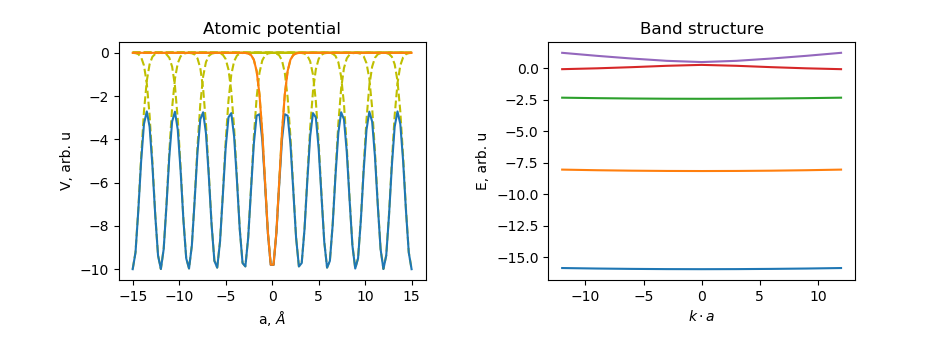

In [42]:
#%matplotlib notebook 
#%matplotlib notebook 
fig.set_size_inches(9.5, 3.5)
fig.subplots_adjust(wspace=0.4, bottom=0.2) #Margins around the subplots
fig